In [114]:
import pandas as pd  
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
import plotly.io as pio
import plotly.colors as colors
pio.templates.default = 'plotly_white'

In [115]:
data = pd.read_csv('Sample - Superstore.csv',encoding='latin-1')

In [116]:
data.head(2)

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.96,2,0.0,41.9136
1,2,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.94,3,0.0,219.5820


In [117]:
data.describe()

,Row ID,Postal Code,Sales,Quantity,Discount,Profit
count,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000
mean,4997.500000,55190.379428,229.858001,3.789574,0.156203,28.656896
std,2885.163629,32063.693350,623.245101,2.225110,0.206452,234.260108
min,1.000000,1040.000000,0.444000,1.000000,0.000000,-6599.978000
25%,2499.250000,23223.000000,17.280000,2.000000,0.000000,1.728750
50%,4997.500000,56430.500000,54.490000,3.000000,0.200000,8.666500
75%,7495.750000,90008.000000,209.940000,5.000000,0.200000,29.364000
max,9994.000000,99301.000000,22638.480000,14.000000,0.800000,8399.976000


In [118]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Row ID         9994 non-null   int64  
 1   Order ID       9994 non-null   object 
 2   Order Date     9994 non-null   object 
 3   Ship Date      9994 non-null   object 
 4   Ship Mode      9994 non-null   object 
 5   Customer ID    9994 non-null   object 
 6   Customer Name  9994 non-null   object 
 7   Segment        9994 non-null   object 
 8   Country        9994 non-null   object 
 9   City           9994 non-null   object 
 10  State          9994 non-null   object 
 11  Postal Code    9994 non-null   int64  
 12  Region         9994 non-null   object 
 13  Product ID     9994 non-null   object 
 14  Category       9994 non-null   object 
 15  Sub-Category   9994 non-null   object 
 16  Product Name   9994 non-null   object 
 17  Sales          9994 non-null   float64
 18  Quantity

In [119]:
data.dtypes

Row ID             int64
Order ID          object
Order Date        object
Ship Date         object
Ship Mode         object
Customer ID       object
Customer Name     object
Segment           object
Country           object
City              object
State             object
Postal Code        int64
Region            object
Product ID        object
Category          object
Sub-Category      object
Product Name      object
Sales            float64
Quantity           int64
Discount         float64
Profit           float64
dtype: object

# Converting Date types :

In [121]:
data['Ship Date'] = pd.to_datetime(data['Ship Date'])
data['Order Date'] = pd.to_datetime(data['Order Date'])

In [122]:
data.dtypes

Row ID                    int64
Order ID                 object
Order Date       datetime64[ns]
Ship Date        datetime64[ns]
Ship Mode                object
Customer ID              object
Customer Name            object
Segment                  object
Country                  object
City                     object
State                    object
Postal Code               int64
Region                   object
Product ID               object
Category                 object
Sub-Category             object
Product Name             object
Sales                   float64
Quantity                  int64
Discount                float64
Profit                  float64
dtype: object

In [123]:
data.head(1)

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.96,2,0.0,41.9136


# We Need Months , Years , Days-Of-Weeks  So We Make Separate columns of these :

In [125]:
data['Order Month'] = data['Order Date'].dt.month
data['Order Year'] = data['Order Date'].dt.year
data['Order Day of week'] = data['Order Date'].dt.dayofweek

In [126]:
data.head(10)

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,Order Month,Order Year,Order Day of week
0,1,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136,11,2016,1
1,2,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820,11,2016,1
2,3,CA-2016-138688,2016-06-12,2016-06-16,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714,6,2016,6
3,4,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310,10,2015,6
4,5,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164,10,2015,6
5,6,CA-2014-115812,2014-06-09,2014-06-14,Standard Class,BH-11710,Brosina Hoffman,Consumer,United States,Los Angeles,...,Furniture,Furnishings,Eldon Expressions Wood and Plastic Desk Access...,48.8600,7,0.00,14.1694,6,2014,0
6,7,CA-2014-115812,2014-06-09,2014-06-14,Standard Class,BH-11710,Brosina Hoffman,Consumer,United States,Los Angeles,...,Office Supplies,Art,Newell 322,7.2800,4,0.00,1.9656,6,2014,0
7,8,CA-2014-115812,2014-06-09,2014-06-14,Standard Class,BH-11710,Brosina Hoffman,Consumer,United States,Los Angeles,...,Technology,Phones,Mitel 5320 IP Phone VoIP phone,907.1520,6,0.20,90.7152,6,2014,0
8,9,CA-2014-115812,2014-06-09,2014-06-14,Standard Class,BH-11710,Brosina Hoffman,Consumer,United States,Los Angeles,...,Office Supplies,Binders,DXL Angle-View Binders with Locking Rings by S...,18.5040,3,0.20,5.7825,6,2014,0
9,10,CA-2014-115812,2014-06-09,2014-06-14,Standard Class,BH-11710,Brosina Hoffman,Consumer,United States,Los Angeles,...,Office Supplies,Appliances,Belkin F5C206VTEL 6 Outlet Surge,114.9000,5,0.00,34.4700,6,2014,0


# Now Performing  EDA And Out Insights :

# Monthly Sales Analysis :

In [140]:
data['Order Month'].describe()

count    9994.000000
mean        7.809686
std         3.284654
min         1.000000
25%         5.000000
50%         9.000000
75%        11.000000
max        12.000000
Name: Order Month, dtype: float64

Min Orders: 300
Max Orders: 1471


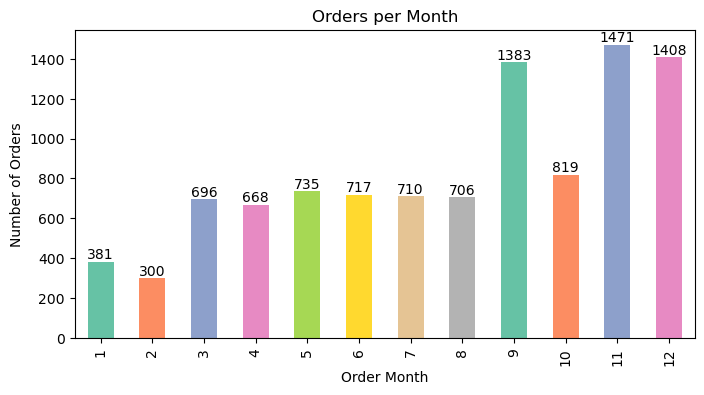

In [142]:
d = data.groupby('Order Month')['Sales'].count()
print("Min Orders:", d.min())
print("Max Orders:", d.max())

ax = d.plot(kind='bar', figsize=(8,4), color=sns.color_palette("Set2"), title="Orders per Month")
ax.set_ylabel("Number of Orders")
ax.bar_label(ax.containers[0])
plt.show()

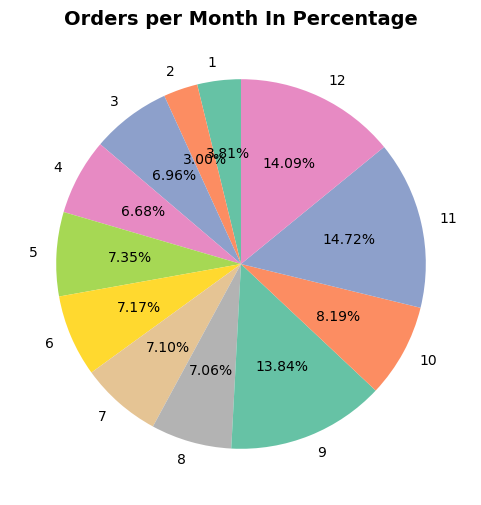

In [144]:
plt.figure(figsize=(7,6))
plt.pie(
    d.values,
    labels=d.index,
    autopct='%.2f%%',
    startangle=90,
    colors=sns.color_palette("Set2")
)
plt.title("Orders per Month In Percentage", fontsize=14, fontweight="bold")
plt.show()

Min Sales per Month: 59751.2514
Max Sales per Month: 352461.071


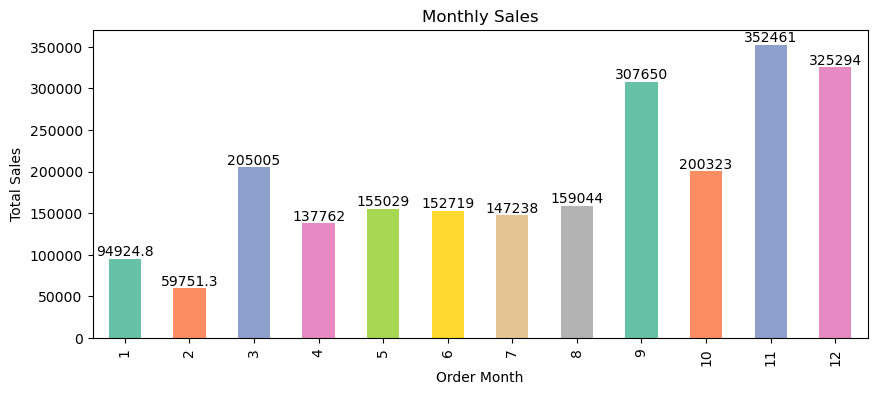

In [145]:
d = data.groupby('Order Month')['Sales'].sum()
print('Min Sales per Month:', d.min())
print('Max Sales per Month:', d.max())

ax = d.plot(kind='bar', figsize=(10,4), color=sns.color_palette("Set2"), title="Monthly Sales")
ax.set_ylabel("Total Sales")
ax.bar_label(ax.containers[0])
plt.show()


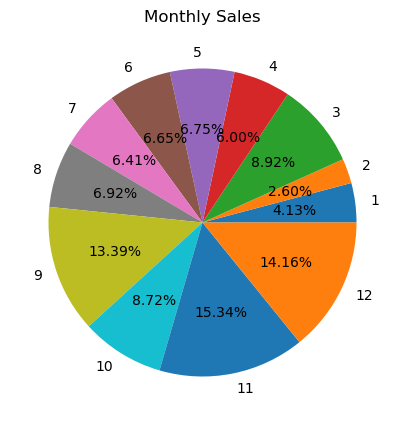

In [147]:
plt.figure(figsize=(5,5))
plt.pie(d,autopct='%.2f%%',labels=d.index)
plt.title('Monthly Sales')
plt.show()

SAB SE ZIYADA SALES OR ORDERS NOVEMBER KE MONTH MA HUWE HY . (11 MONTH)
SAB SE KAM SALES OR ORDERS FEBUARY KE MONTH MA HUWE HY . (2ND MONTH)

# Cteogory sales/counts By Months:

In [152]:
import seaborn as sns

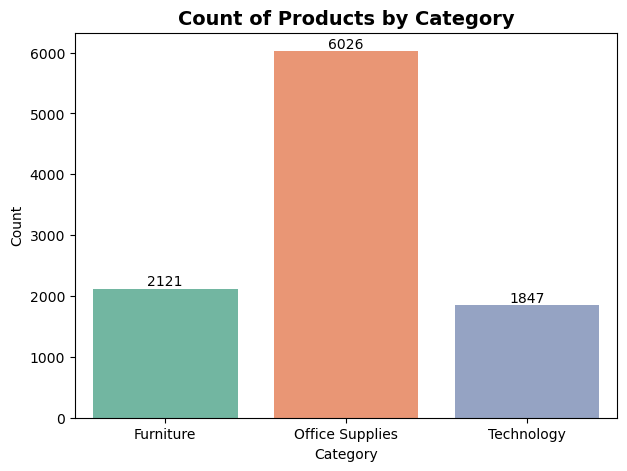

In [154]:
plt.figure(figsize=(7,5))
ax = sns.countplot(x='Category', data=data, palette='Set2',hue='Category')

# Add labels on top of bars
for container in ax.containers:
    ax.bar_label(container, fmt='%d')

# Add title and axis labels
plt.title("Count of Products by Category", fontsize=14, fontweight="bold")
plt.xlabel("Category")
plt.ylabel("Count")

plt.show()

Category
Furniture          2121
Office Supplies    6026
Technology         1847
Name: Sales, dtype: int64


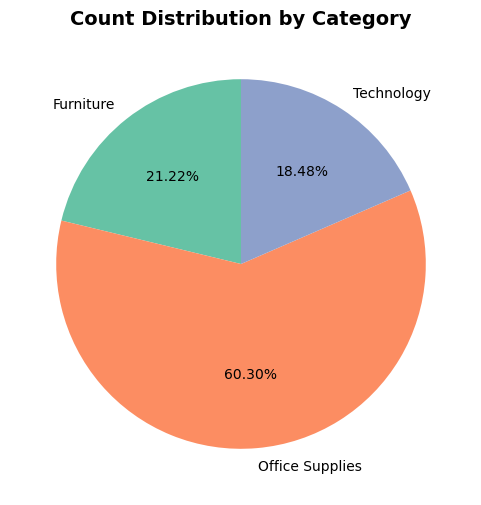

In [155]:
s = data.groupby('Category')['Sales'].count()
print(s)
plt.figure(figsize=(6,6))
plt.pie(
    s, 
    labels=s.index, 
    autopct='%.2f%%', 
    startangle=90,          # rotate for better view
    colors=sns.color_palette("Set2")  # clean colors
)
plt.title("Count Distribution by Category", fontsize=14, fontweight="bold")
plt.show()

Category
Furniture          741999.7953
Office Supplies    719047.0320
Technology         836154.0330
Name: Sales, dtype: float64


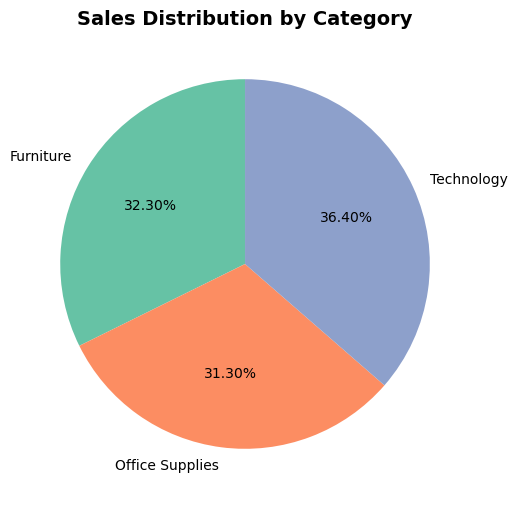

In [157]:
s = data.groupby('Category')['Sales'].sum()
print(s)
plt.figure(figsize=(6,6))
plt.pie(
    s, 
    labels=s.index, 
    autopct='%.2f%%', 
    startangle=90,          # rotate for better view
    colors=sns.color_palette("Set2")  # clean colors
)
plt.title("Sales Distribution by Category", fontsize=14, fontweight="bold")
plt.show()

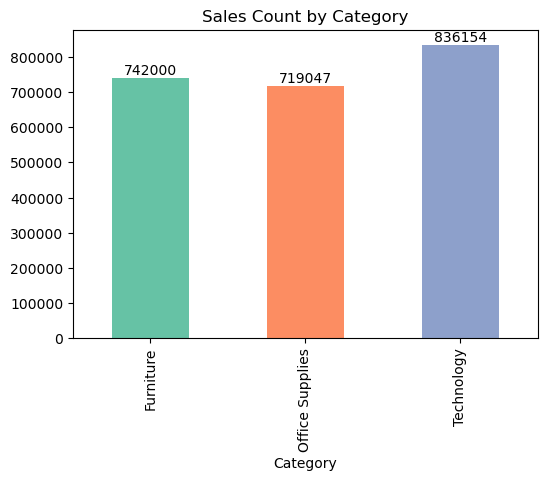

In [159]:
ax = s.plot(kind='bar', color=sns.color_palette("Set2"), figsize=(6,4), title="Sales Count by Category")
ax.bar_label(ax.containers[0])
plt.show()

SAB SE ZIYADA ORDERS OR PRODUCTS OFFICE SUUPLIES KE AYE HY , FURNETURE KE , TECHNOLOGY KE
SAB SE ZIYADA SALES OR INCOME TECHNOLOGY SE GENRATE HUWE HY , FURNITURE SE , OFFICE SUUPLIES SE

# Sales Analysis by sub-category :

   Sub-Category  Sales
0   Accessories    775
1    Appliances    466
2           Art    796
3       Binders   1523
4     Bookcases    228
5        Chairs    617
6       Copiers     68
7     Envelopes    254
8     Fasteners    217
9   Furnishings    957
10       Labels    364
11     Machines    115
12        Paper   1370
13       Phones    889
14      Storage    846
15     Supplies    190
16       Tables    319


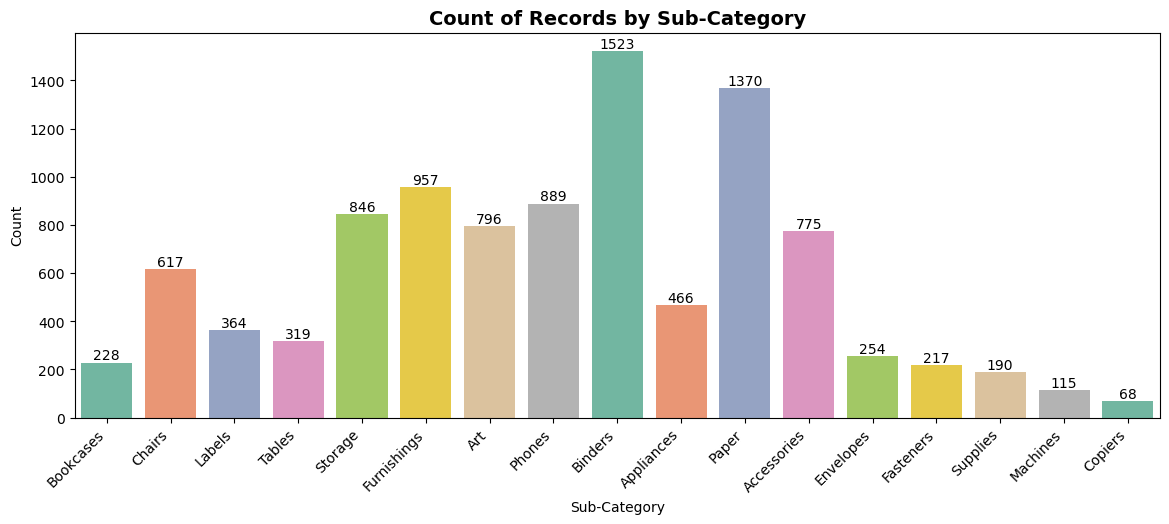

In [164]:
print(data.groupby('Sub-Category')['Sales'].count().reset_index())
plt.figure(figsize=(14,5))
ax = sns.countplot(x='Sub-Category', data=data, palette='Set2',hue='Sub-Category')
for i in ax.containers:
    ax.bar_label(i)
plt.title("Count of Records by Sub-Category", fontsize=14, fontweight="bold")
plt.xlabel("Sub-Category")
plt.ylabel("Count")
plt.xticks(rotation=45, ha="right")
plt.show()

SAB SE ZIYADA BINDERS SELL HUWE HY , THEN PAPERS .

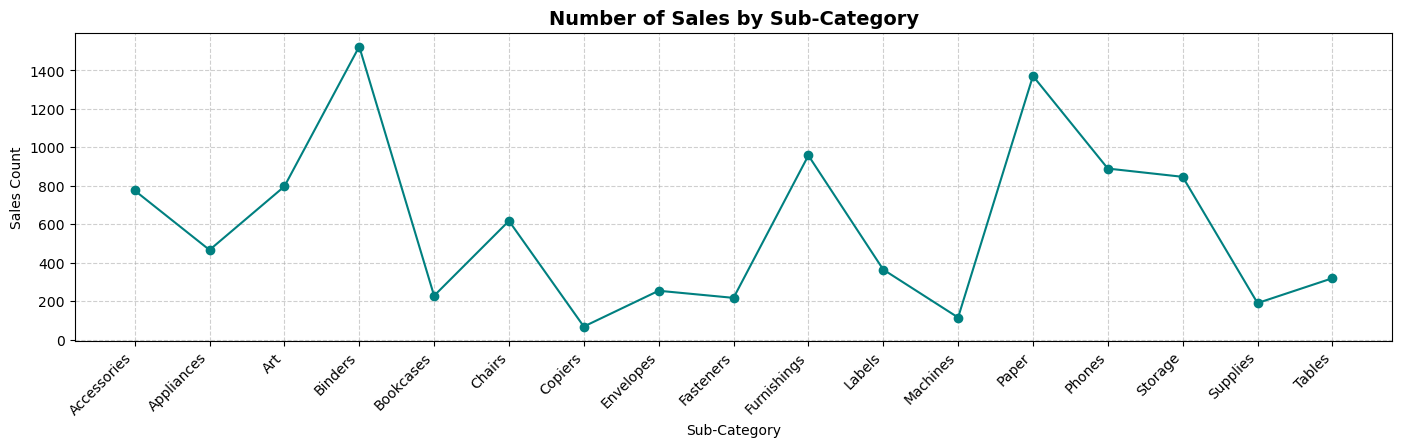

In [166]:
Cat = data.groupby('Sub-Category')['Sales'].count().reset_index()
plt.figure(figsize=(17,4))
plt.plot(Cat['Sub-Category'], Cat['Sales'], marker='o', linestyle='-', color='teal')

# Enhancements
plt.title("Number of Sales by Sub-Category", fontsize=14, fontweight='bold')
plt.xlabel("Sub-Category")
plt.ylabel("Sales Count")
plt.xticks(rotation=45, ha='right')
plt.grid(linestyle='--', alpha=0.6)

plt.show()

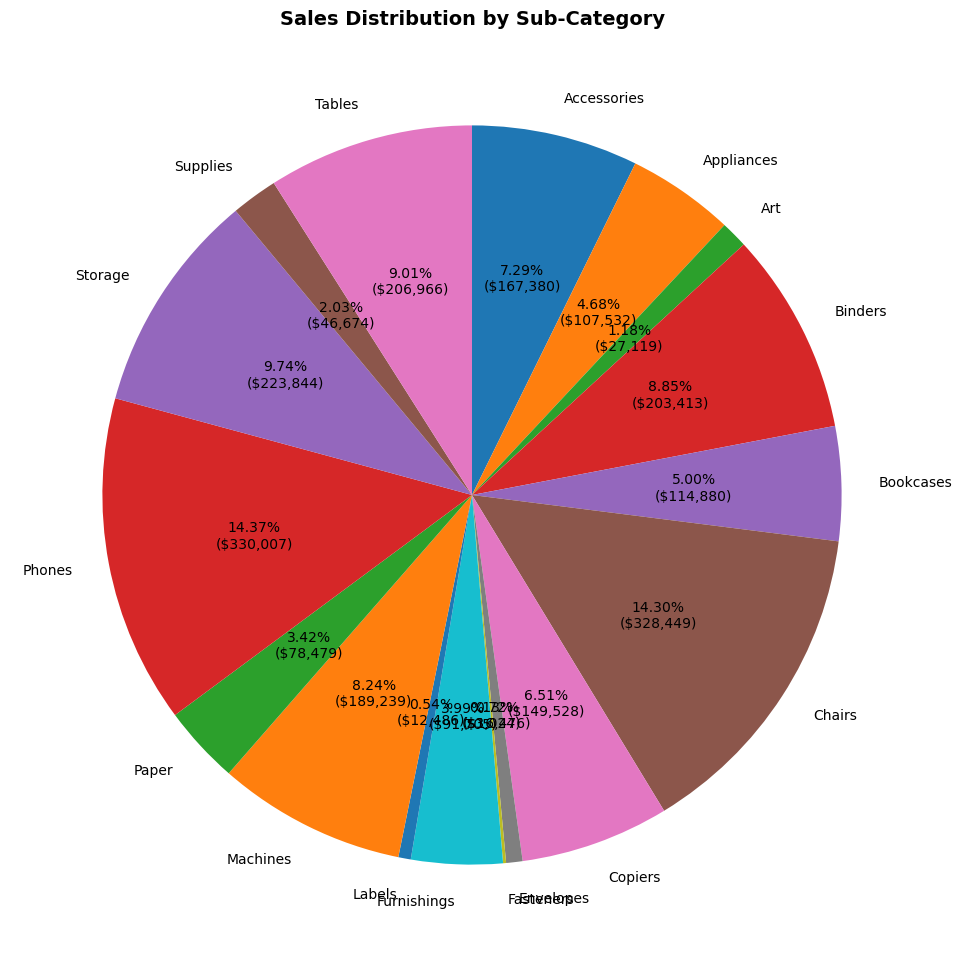

In [167]:
Cat = data.groupby('Sub-Category')['Sales'].sum().reset_index()

plt.figure(figsize=(15,12))
plt.pie(
    Cat['Sales'],
    labels=Cat['Sub-Category'],
    autopct=lambda p: f"{p:.2f}%\n(${p*Cat['Sales'].sum()/100:,.0f})",  # show % + value
    startangle=90,
    counterclock=False
)
plt.title("Sales Distribution by Sub-Category", fontsize=14, fontweight="bold")
plt.show()


SAB SE ZIYADA OREDERS BINDER KE HY , THEN PAPARS KE HY 
SAB SE KAM ORDERS COPIERS KE AYE HY
SAB SE ZIYADA PROFIT PHONES SE HOWA HY , THEN CHAIRS SE HOWA HY
SAB SE KAM SAELS FASTNERS SE HOWA HY.

# Analysis By Month profit :

In [171]:
month_profit  = data.groupby('Order Month')['Profit'].sum().reset_index()
print(month_profit.min())
print(month_profit.max())

Order Month       1.0000
Profit         9134.4461
dtype: float64
Order Month       12.0000
Profit         43369.1919
dtype: float64


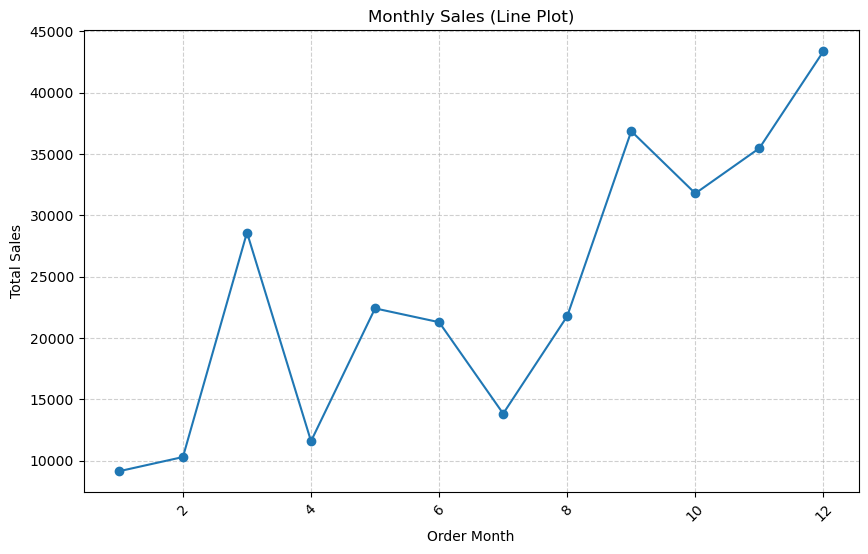

In [173]:
plt.figure(figsize=(10,6))
plt.plot(month_profit['Order Month'], month_profit['Profit'], marker='o')

plt.xlabel("Order Month")
plt.ylabel("Total Sales")
plt.title("Monthly Sales (Line Plot)")
plt.xticks(rotation=45)
plt.grid(linestyle='--', alpha=0.6)
plt.show()

SAB SE ZIYADA PROFIT 12 MONTH DECEMBER MA HUWA HY.

# profit by month of category

In [176]:
Category_profit = data.groupby('Category')['Profit'].sum()
Category_profit

Category
Furniture           18451.2728
Office Supplies    122490.8008
Technology         145454.9481
Name: Profit, dtype: float64

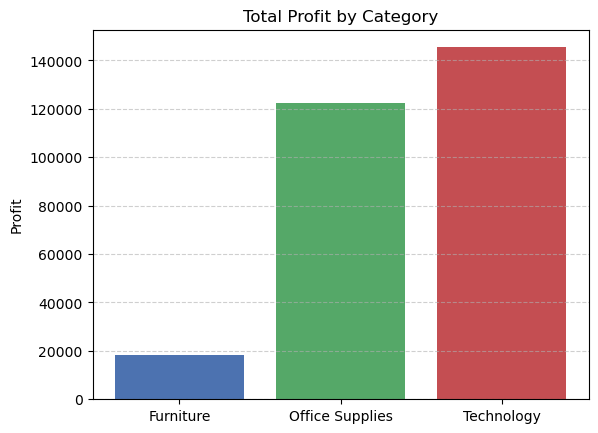

In [179]:
plt.bar(Category_profit.index, Category_profit.values, color=['#4C72B0','#55A868','#C44E52'])
plt.title("Total Profit by Category")
plt.ylabel("Profit")
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.show()

SAB SE ZIYADA PROFIR TECHNOLOGY MA HOWA HY , THEN OFFICE SUPLIES MA , THEN FURNITURE MA .

# Profit by month of sub-category

In [184]:
Sub_Category_profit = data.groupby('Sub-Category')['Profit'].sum()
Sub_Category_profit

Sub-Category
Accessories    41936.6357
Appliances     18138.0054
Art             6527.7870
Binders        30221.7633
Bookcases      -3472.5560
Chairs         26590.1663
Copiers        55617.8249
Envelopes       6964.1767
Fasteners        949.5182
Furnishings    13059.1436
Labels          5546.2540
Machines        3384.7569
Paper          34053.5693
Phones         44515.7306
Storage        21278.8264
Supplies       -1189.0995
Tables        -17725.4811
Name: Profit, dtype: float64

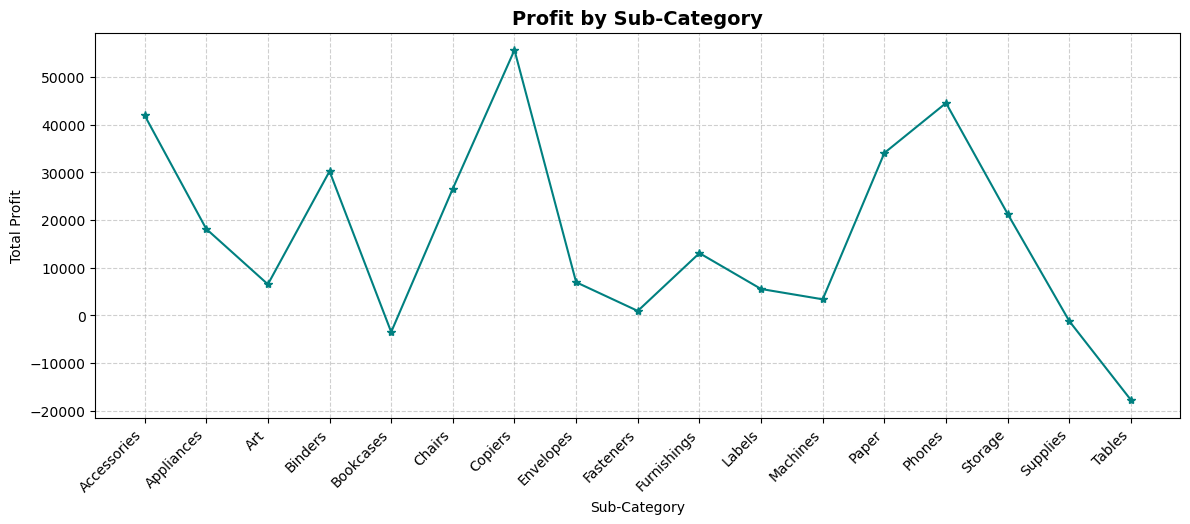

In [186]:

plt.figure(figsize=(14,5))
plt.plot(Sub_Category_profit.index, Sub_Category_profit.values, marker='*', linestyle='-', color='teal')
plt.title("Profit by Sub-Category", fontsize=14, fontweight='bold')
plt.xlabel("Sub-Category")
plt.ylabel("Total Profit")
plt.xticks(rotation=45, ha='right')
plt.grid(linestyle='--', alpha=0.6)
plt.show()

SAB CATEGORY MA SAB SE ZIYADA PROFIT COPIERS MA HUWA HY , THEN PHONES MA , THEN ACCESSORIES APPLIENCE MA.

# Sales by customres segment :

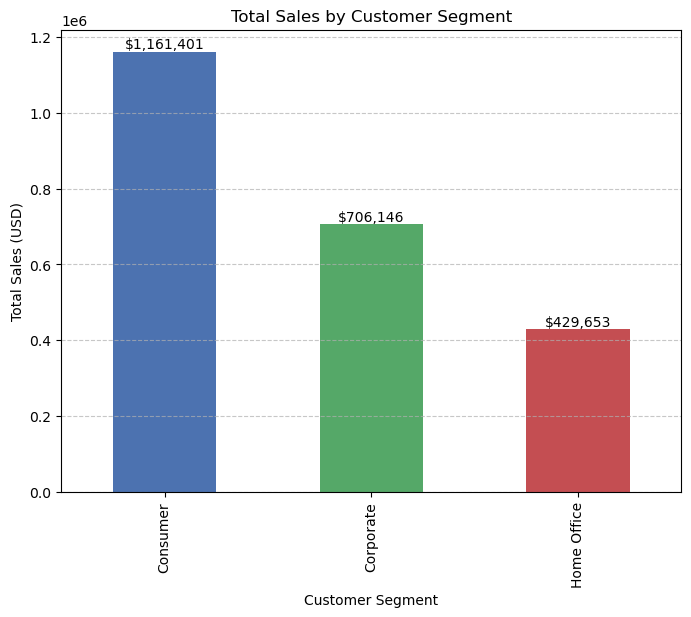

In [190]:
sales_cus_seg = data.groupby('Segment')['Sales'].sum()

ax = sales_cus_seg.plot(kind='bar', figsize=(8,6), color=['#4C72B0','#55A868','#C44E52'], title="Total Sales by Customer Segment")
ax.set_xlabel("Customer Segment")
ax.set_ylabel("Total Sales (USD)")
ax.bar_label(ax.containers[0], labels=[f"${v:,.0f}" for v in sales_cus_seg.values])
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


In [192]:
SAB SE ZIYAADA SALES CONSUMER KE SIDE HY , THEN CORPORATE , THEN HOME OFFICE .

SyntaxError: invalid syntax (3141957111.py, line 1)

# Profit by customre segments :

In [ ]:
plt.figure(figsize=(8,6))
bars = plt.bar(profit_cus_seg.index, profit_cus_seg.values, color=['#1f77b4', '#ff7f0e', '#2ca02c'])

# Add labels on top of bars
for bar in bars:
    plt.text(
        bar.get_x() + bar.get_width()/2,
        bar.get_height(),
        f"{bar.get_height():,.0f}",  # formatted with commas
        ha='center',
        va='bottom',
        fontsize=10,
        fontweight='bold'
    )

# Styling
plt.title("Total Profit by Customer Segment", fontsize=14, fontweight='bold')
plt.xlabel("Customer Segment")
plt.ylabel("Total Profit")
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.show()

SAB SE ZIYADA PROFIT CONSUMER SE HUWA HY , THEN CORPORATE SE ,THEN HOME OFFICES SE.

# Sales : Profit Ratio  :

In [197]:
Sales_Profit = data.groupby('Segment').agg({'Sales':'sum','Profit':'sum'}).reset_index()
ratio = Sales_Profit['Sales']/Sales_Profit['Profit']
ratio

0    8.659471
1    7.677245
2    7.125416
dtype: float64

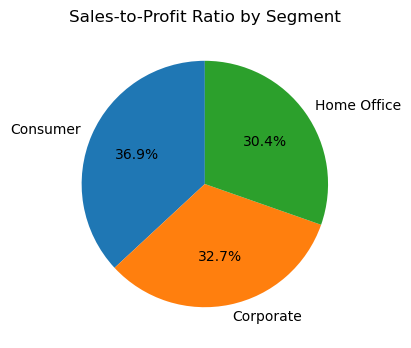

In [199]:
plt.figure(figsize=(4,4))
plt.pie(ratio, labels=Sales_Profit['Segment'], autopct='%.1f%%', startangle=90)
plt.title("Sales-to-Profit Ratio by Segment")
plt.show()

SALES & PROFIT RATIO MA SAB SE ZIYADA PROFIT CONSUMERS HUWA , THEN CORPORATE SE , THEN HOME OFFICE SE.

# Sales and Profit Analysis Report

1. Monthly Sales Analysis
The highest sales and orders were recorded in November (11th month).
The lowest sales and orders were recorded in February (2nd month).

2. Category Sales/Counts by Months
Orders: Most orders came from Office Supplies, followed by Furniture and Technology.
Sales (Revenue): Highest revenue was generated from Technology, followed by Furniture and Office Supplies.

3. Sales Analysis by Sub-Category
Highest Sales: Binders, followed by Paper.
Highest Orders: Binders, followed by Paper.
Lowest Orders: Copiers.

4. Monthly Profit Analysis
The highest profit was achieved in December (12th month).
By sub-category, the highest profit came from Phones, followed by Chairs.
The lowest sales were from Fasteners.

5. Profit by Category and Sub-Category
By Category: Highest profit in Technology, followed by Office Supplies and Furniture.
By Sub-Category: Highest profit in Copiers, followed by Phones and Accessories/Appliances.

6. Sales and Profit by Customer Segment
Sales: Highest from Consumer, followed by Corporate and Home Office.
Profit: Highest from Consumer, followed by Corporate and Home Office.

7. Sales-to-Profit Ratio
The best sales-to-profit ratio was achieved by the Consumer segment, followed by Corporate and Home Office.